# Quantum Dice
## Quantum-lab Example

### Prerequisite tasks
To set up this example, you must first have qiskit python library installed in your system (aprox. 1-2 minutes)

In [1]:
%pip install qiskit pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files (x86)\Python38-32\python.exe -m pip install --upgrade pip' command.


In [2]:
from qiskit import *


Se importa todo desde Qiskit, y el siguiente paso es construir un circuito cuántico. 

Para ejecutar un dado (del 0 al 6) representados del 000 al 111 necesitamos 3 qubits. Vamos a construir un circuito de tres qubits:


In [3]:
qr = QuantumRegister(3, 'q')

Después se crearán tres registros clásicos para medir el valor de los bits cuánticos:

In [4]:
cr=ClassicalRegister(3,'c') 

El siguiente paso es construir un circuito que utilice los tres qubits con sus registros, y de esta forma, creamos un circuito cuántico:

In [5]:
circuit = QuantumCircuit(qr,cr)

Podemos visualizar el circuito con:



In [6]:
%matplotlib inline
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

Ahora que ya tenemos el circuito con 3 qubits (q_0, q1_, q_2) y tres bits clásicos (c_0, c_1, c_2). 

Vamos a poner los tres qubits en estado de superposición aplicando una puerta Hadamard a cada uno

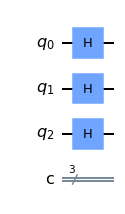

In [7]:
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.draw(output="mpl")

Ya tenemos preparado el dado para realizar la medición de la tirada, usando medidores:

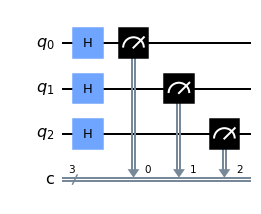

In [8]:
circuit.measure(qr,cr)
circuit.draw(output="mpl")

Para hacer una simulación de este circuito en nuestro ordenador clásico, vamos a usar el componente de Qiskit “Aer”. Importamos desde “qiskit aer” el simulador QASM SIMULATOR.

In [9]:
simulator= Aer.get_backend('qasm_simulator')

Una vez importado, ejecutamos el circuito

In [10]:
#execute(circuit,backend= simulator)
result= execute(circuit,backend=simulator).result()

Usaremos "plot_histogram" para ver los resultados

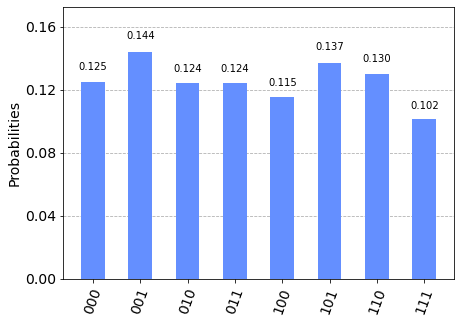

In [11]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Se obtiene así el resultado del circuito cuántico en un simulador. 

Vemos que se consigue aproximadamente la misma de probabilidad (0.125) de obtener cualquiera de las 8 posibilidades (000 a 111).

Lo normal es realizar 1024 disparos (ejecuciones) para obtener una media aproximada más ajustada y evitar los errores.